---

**Подключение библиотек и скриптов**

In [171]:
import numpy as np
import pandas as pd
import pickle

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [172]:
import warnings
warnings.filterwarnings('ignore')

In [173]:
# matplotlib.rcParams.update({'font.size': 14})

**Пути к директориям и файлам**

In [174]:
# input
TRAIN_DATASET_PATH = '/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/Macerszmidt_train_5.csv'
PREPARED_DATASET_PATH = '/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/train.csv'
SCALER_FILE_PATH = '/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/Macerszmidt_scaler_5.pkl'
MODEL_FILE_PATH = '/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/Macerszmidt_model_5.pkl' 

### Загрузка данных

In [175]:
df = pd.read_csv(PREPARED_DATASET_PATH)
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,61
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,76
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57


In [176]:
df.columns.tolist()

['Id',
 'age',
 'years_of_experience',
 'lesson_price',
 'qualification',
 'physics',
 'chemistry',
 'biology',
 'english',
 'geography',
 'history',
 'mean_exam_points']

In [177]:
feature_names = ['Id',
 'age',
 'years_of_experience',
 'lesson_price',
 'qualification',
 'physics',
 'chemistry',
 'biology',
 'english',
 'geography',
 'history'
 ]

target_name = 'mean_exam_points'

In [178]:
df = df[feature_names + [target_name]]
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,61
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,76
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57


### Сохранение обучающего датасета

In [179]:
df.to_csv(TRAIN_DATASET_PATH, index=False, encoding='utf-8')

### Разбиение на train и test

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
X = df[feature_names]
y = df[target_name]

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.19, shuffle=True, random_state=21)

In [183]:
from sklearn.linear_model import LinearRegression

In [184]:
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from math import sqrt

In [185]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(sqrt(mse(true_values, pred_values)), 3)))
    
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()
    return None

**Обучение и оценка модели**

In [186]:
final_model = LinearRegression()
final_model.fit(X_train, y_train)

LinearRegression()

R2:	0.551
MAE:	7.921
MSE:	96.477
RMSE:	9.822


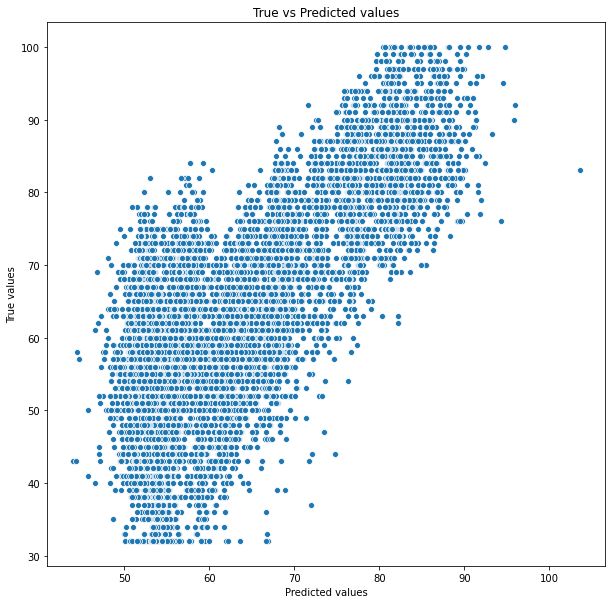

In [187]:
y_train_preds = final_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.554
MAE:	8.101
MSE:	99.463
RMSE:	9.973


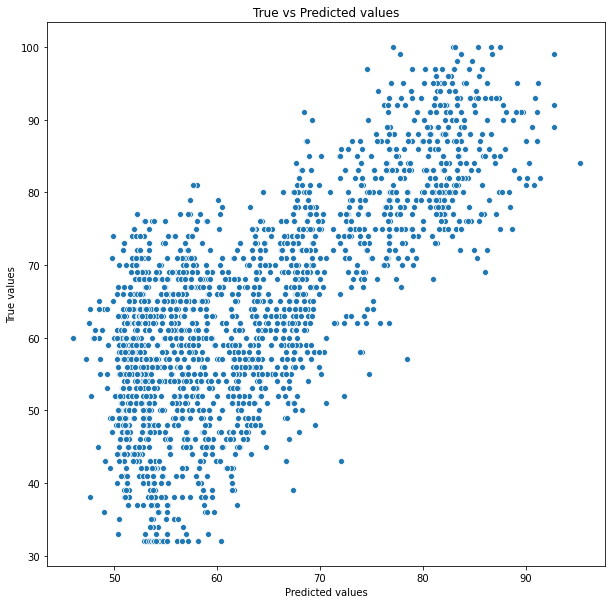

In [188]:
y_test_preds = final_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

### Сохранение модели

**Model**

In [189]:
MODEL_FILE_PATH

'/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/Macerszmidt_model_5.pkl'

In [190]:
with open(MODEL_FILE_PATH, 'wb') as file:
    pickle.dump(final_model, file)

In [191]:
Test_DATASET_PATH = '/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/Macerszmidt_test_prep_5.csv'
PREPARED_DATASET_test_PATH = '/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/test.csv'

# output

In [192]:
test = pd.read_csv(PREPARED_DATASET_test_PATH)
test = test[feature_names]
test.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


In [193]:
final_preds = final_model.predict(test)
final_preds

array([50.53788757, 65.53256246, 59.24234075, ..., 51.45107706,
       64.5776174 , 72.42981724])

In [194]:
final_preds.shape

(10000,)

In [195]:
predicted_df = pd.DataFrame(final_preds, test['Id'], columns=['mean_exam_points'])
predicted_df.to_csv('predicted_defaults.csv', index_label= 'Id')

In [196]:
predicted_df.head()

,mean_exam_points
Id,
10000,50.537888
10001,65.532562
10002,59.242341
10003,89.612665
10004,90.193493


**Сохраняем полученную модель**

In [197]:
predicted_df.to_csv('/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/EMacerszmidt_predictions_tosend_5.csv', index='Id')

In [198]:
f = pd.read_csv('/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/EMacerszmidt_predictions_tosend_5.csv')
f.head()

,Id,mean_exam_points
0,10000,50.537888
1,10001,65.532562
2,10002,59.242341
3,10003,89.612665
4,10004,90.193493
